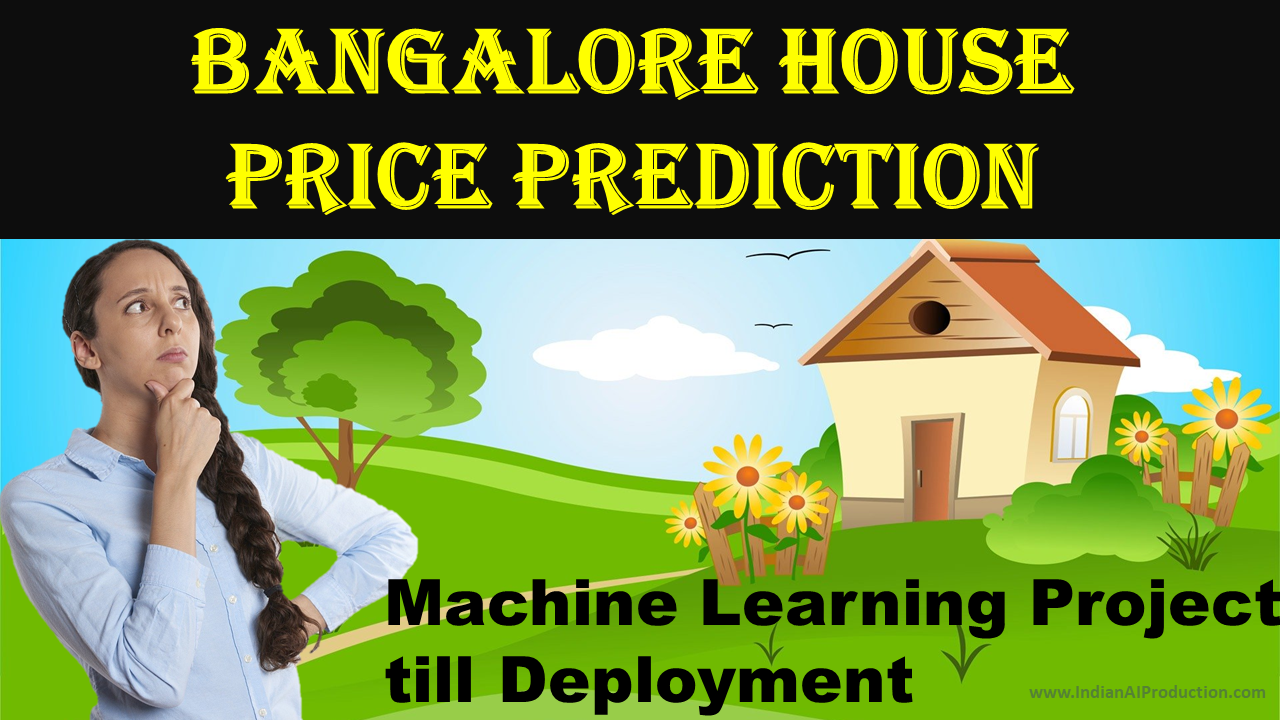

In [ ]:
from IPython.display import Image
Image('/content/bangalore-house-price-prediction_image.png')

In [ ]:
#data manipulation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
# Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer,make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
# Model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Model persistence
import pickle

# Web framework
from flask import Flask, request, render_template
#warning ignore
import warnings
warnings.filterwarnings('ignore')

##Load Bengaluru house dataset

In [ ]:
df=pd.read_csv('/content/Bengaluru_House_Data.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [ ]:
#shape of datset
df.shape

(13320, 9)

##EDA(Explotary Data Analysis)
-data summary.\
-treating data missing value .\
-remove outlier.\
-drop unnecessary columns.\
-dataa viusalization

In [ ]:
#data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [ ]:
#Area_type house  count
df.groupby('area_type')['area_type'].agg('count')

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [ ]:
#check the null values
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [ ]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


#Treat missing values

In [ ]:
#delete most unnecessary column
df=df.drop(['society','area_type','availability','balcony'],axis=1)

In [ ]:
df.shape

(13320, 5)

In [ ]:
#drop misssing value in column location
df = df.dropna(subset=['location'])

# Display the number of remaining rows and columns
print(df.shape)

(13319, 5)


In [ ]:
#check every column value count of different iteams
for column in df.columns:
  print(df[column].value_counts())
  print('-'*10)

location
Whitefield                        540
Sarjapur  Road                    399
Electronic City                   302
Kanakpura Road                    273
Thanisandra                       234
                                 ... 
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
singapura paradise                  1
Abshot Layout                       1
Name: count, Length: 1305, dtype: int64
----------
size
2 BHK         5199
3 BHK         4309
4 Bedroom      826
4 BHK          591
3 Bedroom      547
1 BHK          538
2 Bedroom      329
5 Bedroom      297
6 Bedroom      191
1 Bedroom      105
8 Bedroom       84
7 Bedroom       83
5 BHK           59
9 Bedroom       46
6 BHK           30
7 BHK           17
1 RK            13
10 Bedroom      12
9 BHK            8
8 BHK            5
11 BHK           2
11 Bedroom       2
10 BHK           2
14 BHK           1
13 BHK           1
12 Bedroom       1
27 BHK           1
43 B

In [ ]:
#filled size column with 2bhk flat
df['size']=df['size'].fillna('2 BHK')

In [ ]:
#bartroom column can be integer comn filed with median value
df['bath']=df['bath'].fillna(df['bath'].median())

In [ ]:
#check the null/nan value after treating the null values
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [ ]:
#unique iteam in size column bhk = bedroom same we have to change it
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [ ]:
#size column bhk = bedroom  we create column only take integer from size  column(extract integer)
df['bhk']=df['size'].str.split().str.get(0).astype(int)

In [ ]:
#drop size columns
df=df.drop(['size'],axis=1)

In [ ]:
#check unique value of total_sqft
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [ ]:
#there are some range in this data we have treat it by replace with range mean value instead of range
#create function around this problem then apply in column
def convertRange(x):
  temp=x.split('-')
  if len(temp)==2: #after split get two number
    return (float(temp[0])+float(temp[1]))/2 #if two number after split then find mean
  try:
    return float(x)
  except:
    return None

In [ ]:
#above fuction should apply in total_sqft column
df['total_sqft']=df['total_sqft'].apply(convertRange)

In [ ]:
#after treating range replace by its mean check it out
df['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [ ]:
#create new column price per sqft
df['price_per_sqft']=df['price']*100000/df['total_sqft']
df['price_per_sqft']

0         3699.810606
1         4615.384615
2         4305.555556
3         6245.890861
4         4250.000000
             ...     
13315     6689.834926
13316    11111.111111
13317     5258.545136
13318    10407.336319
13319     3090.909091
Name: price_per_sqft, Length: 13319, dtype: float64

In [ ]:
#check data description on total_sqft
(df['total_sqft']/df['bhk']).describe()

count    13273.000000
mean       575.078023
std        388.219630
min          0.250000
25%        473.333333
50%        552.500000
75%        625.000000
max      26136.000000
dtype: float64

In [ ]:
#check  outlier in dataset total_sqrt less then 300 becuase it take between min to 1st quatile(25%)
df=df[df['total_sqft']/df['bhk']>=300]
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,12529.000000,12529.000000,12529.000000,12529.000000,12529.000000
mean,1594.564110,2.559502,111.384427,2.650810,6304.053504
std,1261.321632,1.077974,152.083230,0.976712,4162.395819
min,300.000000,1.000000,8.440000,1.000000,267.829813
25%,1116.000000,2.000000,49.000000,2.000000,4210.526316
50%,1300.000000,2.000000,70.000000,3.000000,5294.117647
75%,1700.000000,3.000000,115.000000,3.000000,6916.666667
max,52272.000000,16.000000,3600.000000,16.000000,176470.588235


In [ ]:
df.shape

(12529, 6)

In [ ]:
df['location'].value_counts()

location
Whitefield           537
Sarjapur  Road       395
Electronic City      293
Kanakpura Road       269
Thanisandra          232
                    ... 
MRCR Layout            1
Arekempanahalli        1
Devarabisanahalli      1
CR Layout              1
Abshot Layout          1
Name: count, Length: 1216, dtype: int64

In [ ]:
#Removing space between location name
df['location']=df['location'].apply(lambda x: x.strip())
location_stats=df['location'].value_counts()
location_stats

location
Whitefield                   538
Sarjapur  Road               395
Electronic City              295
Kanakpura Road               269
Thanisandra                  235
                            ... 
Escorts Colony                 1
Rahat Bagh                     1
Rajanna Layout                 1
Lakshmipura Vidyaanyapura      1
Abshot Layout                  1
Name: count, Length: 1206, dtype: int64

In [ ]:
#check location count less then 10
location_count_less10=location_stats[location_stats<=10]
location_count_less10

location
Basapura                     10
Shivaji Nagar                10
Laggere                      10
Bommenahalli                 10
Sadashiva Nagar              10
                             ..
Escorts Colony                1
Rahat Bagh                    1
Rajanna Layout                1
Lakshmipura Vidyaanyapura     1
Abshot Layout                 1
Name: count, Length: 984, dtype: int64

In [ ]:
#location count less then 10 filled with other
df['location']=df['location'].apply(lambda x: 'other' if x in location_count_less10 else x)
#check value count each iteams
df['location'].value_counts()

location
other                        2718
Whitefield                    538
Sarjapur  Road                395
Electronic City               295
Kanakpura Road                269
                             ... 
Banashankari Stage VI          11
2nd Phase Judicial Layout      11
Vasanthapura                   11
LB Shastri Nagar               11
Nehru Nagar                    11
Name: count, Length: 223, dtype: int64

In [ ]:
#check outer the price_per_sqft outlier
df['price_per_sqft'].describe()

count     12529.000000
mean       6304.053504
std        4162.395819
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [ ]:
#treat outer price per sqft function
def remove_outlier_sqft(df):
  df_output=pd.DataFrame()
  for key,subdf in df.groupby('location'):
    m=np.mean(subdf.price_per_sqft)
    st=np.std(subdf.price_per_sqft)
    reduced_df=subdf[(subdf.price_per_sqft>(m-st))&(subdf.price_per_sqft<=(m+st))]
    df_output=pd.concat([df_output,reduced_df],ignore_index=True)
  return df_output
df=remove_outlier_sqft(df)
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,10329.000000,10329.000000,10329.000000,10329.000000,10329.000000
mean,1509.603612,2.473134,90.978370,2.576629,5644.827600
std,883.540653,0.981076,85.461228,0.902788,2219.004021
min,300.000000,1.000000,10.000000,1.000000,1250.000000
25%,1110.000000,2.000000,49.000000,2.000000,4240.282686
50%,1285.000000,2.000000,67.000000,2.000000,5175.159236
75%,1650.000000,3.000000,100.000000,3.000000,6427.378965
max,30400.000000,16.000000,2200.000000,16.000000,24000.000000


In [ ]:
#removing outetr in bhk column creating function
def remove_bhk_outlier(df):
  exclude_indices=np.array([])
  for location,location_df in df.groupby('location'):
    bhk_stats={}
    for bhk,bhk_df in location_df.groupby('bhk'):
      bhk_stats[bhk]={
          'mean':np.mean(bhk_df.price_per_sqft),
          'std':np.std(bhk_df.price_per_sqft),
          'count':bhk_df.shape[0]
      }
    for bhk,bhk_df in location_df.groupby('bhk'):
      stats=bhk_stats.get(bhk-1)
      if stats and stats['count']>5:
        exclude_indices=np.append(exclude_indices,bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
  return df.drop(exclude_indices,axis='index')

In [ ]:
df=remove_bhk_outlier(df)
df.shape

(7296, 6)

In [ ]:
#now we can remove price per sqft because it has only requied to find outlier in dataset
df=df.drop(['price_per_sqft'],axis=1)

#cleaned dataset

In [ ]:
df.head()

,location,total_sqft,bath,price,bhk
1,1st Phase JP Nagar,1875.0,3.0,167.0,3
2,1st Phase JP Nagar,1500.0,5.0,85.0,5
3,1st Phase JP Nagar,2065.0,4.0,210.0,3
5,1st Phase JP Nagar,2059.0,3.0,225.0,3
6,1st Phase JP Nagar,1394.0,2.0,100.0,2


In [ ]:
#saved the cleaned  bengaluru house dataset datset
df.to_csv('Bengaluru_house_price_cleaned.csv')

##Spliting the datset in to train and test datset to prediction

In [ ]:
X=df.drop(['price'],axis=1)
y=df['price'] #target column for prediction

In [ ]:
#split data into  train and test data get same split random_state=0
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#check shape of both train and test data
print("Train data shape:-",X_train.shape)
print("Test data shape:-",X_test.shape)

Train data shape:- (5836, 4)
Test data shape:- (1460, 4)


In [ ]:
# List of numerical and categorical columns
numerical_cols= X.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns
print(numerical_cols)
print(categorical_cols)

Index(['total_sqft', 'bath', 'bhk'], dtype='object')
Index(['location'], dtype='object')


#convert categorical column into numarical use onehut encoding

In [ ]:
#There are location only one cxolumn categorical so we specified
col_trans=make_column_transformer((OneHotEncoder(sparse=False),['location']),remainder='passthrough')

In [ ]:
scaler=StandardScaler() #numarical value transform

##Apply linear regression model

In [ ]:
model_lr=LinearRegression()

In [ ]:
#use pipline to pass all these
pipe_lr=make_pipeline(col_trans,scaler,model_lr)

In [ ]:
#fit train dta into the pipeline
pipe_lr.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

In [ ]:
#use this pipeline predict the data
y_pred_lr=pipe_lr.predict(X_test)

In [ ]:
#check the mse,mae,rmse and r2 score this model
mse = mean_squared_error(y_test, y_pred_lr)
mae = mean_absolute_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
r2_score=r2_score(y_test,y_pred_lr)

In [ ]:
# Evaluate the model on mse, mae, rmse, r2 score
print(f"Mean Squared Error: {mse:.2f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"R Squared: {r2_score:.2f}")

Mean Squared Error: 1665.22
Mean Absolute Error: 18.57
Root Mean Squared Error: 40.81
R Squared: 0.82


##Applying Lasso regression

In [ ]:
lasso=Lasso()

In [ ]:
#use pipline to pass all these
pipe_ls=make_pipeline(col_trans,scaler,lasso)

In [ ]:
#fit train dta into the pipeline
pipe_ls.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('lasso', Lasso())])

In [ ]:
#use this pipeline predict the data
y_pred_ls=pipe_ls.predict(X_test)

In [ ]:
#check the mse,mae,rmse and r2 score this model
mse1= mean_squared_error(y_test, y_pred_ls)
mae1 = mean_absolute_error(y_test, y_pred_ls)
rmse1 = np.sqrt(mse1)

In [ ]:
# Evaluate the model on mse, mae, rmse, r2 score
print(f"Mean Squared Error: {mse1:.2f}")
print(f"Mean Absolute Error: {mae1:.2f}")
print(f"Root Mean Squared Error: {rmse1:.2f}")

Mean Squared Error: 1741.19
Mean Absolute Error: 19.89
Root Mean Squared Error: 41.73


##Apply Rigde regression

In [ ]:
ridge_model=Ridge()

In [ ]:
pipe_rd=make_pipeline(col_trans,scaler,ridge_model)

In [ ]:
pipe_rd.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(sparse=False),
                                                  ['location'])])),
                ('standardscaler', StandardScaler()), ('ridge', Ridge())])

In [ ]:
y_pred_rd=pipe_rd.predict(X_test)

In [ ]:
#check the mse,mae,rmse and r2 score this model
mse2= mean_squared_error(y_test, y_pred_rd)
mae2 = mean_absolute_error(y_test, y_pred_rd)
rmse2 = np.sqrt(mse2)

In [ ]:
# Evaluate the model on mse, mae, rmse, r2 score
print(f"Mean Squared Error: {mse2:.2f}")
print(f"Mean Absolute Error: {mae2:.2f}")
print(f"Root Mean Squared Error: {rmse2:.2f}")

Mean Squared Error: 1665.63
Mean Absolute Error: 18.57
Root Mean Squared Error: 40.81


#save the final model ridge in pickle

In [ ]:
import pickle
pickle.dump(pipe_rd,open('final_ridge_model.pkl','wb'))

#Now ready to Deploy this saved model